In [1]:
from ecog_speech import datasets, experiments, result_parsing, utils, feature_processing, pipeline
import pandas as pd
import h5py
import numpy as np

from scipy.io import loadmat

from ecog_speech import plot_label_regions
from ecog_speech import visuals as viz

In [2]:
hvs_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')
hvs_tuples

[('UCSD', 28, 1, 1)]

In [3]:
hvs = datasets.HarvardSentences(hvs_tuples, pre_processing_pipeline='audio_gate_speaking_only')

2022-03-17 21:59:50,375 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - preparing pipeline
2022-03-17 21:59:50,376 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - DEBUG - Available pipelines: ['audio_gate', 'audio_gate_speaking_only', 'audio_gate_imagine', 'default']
2022-03-17 21:59:50,376 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - 'audio_gate_speaking_only' pipeline selected
2022-03-17 21:59:50,377 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 21:59:50,388 - ecog_speech.datasets.HarvardSentences.load_data - INFO - ---28-1-1-UCSD---
2022-03-17 21:59:50,389 - ecog_speech.datasets.HarvardSentences.load_data - INFO - |--->Using Subset: Data
2022-03-17 21:59:50,389 - ecog_speech.datasets.HarvardSentences.make_filename - INFO - Harvard sentences only uses location and patient identifiers
2022-03-17 21:59:50,389 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat
2022-03-17 21:59:50,393 - ecog_speech.datasets.HarvardSentences.load_mat_from_path - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-03-17 21:59:55,157 - ecog_speech.datasets.HarvardSentences.load_data - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode']
2022-03-17 21:59:55,159 - eco

Processing stim regions:   0%|          | 0/249 [00:00<?, ?it/s]

2022-03-17 22:01:01,628 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform - DEBUG - Updated keys: {'n_samples_per_window', 'sample_index_map'}
2022-03-17 22:01:01,629 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - N samples per window: 256
2022-03-17 22:01:01,680 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], None)}
2022-03-17 22:01:01,680 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__ - INFO - Selected columns with -union- method: 0, 1, 2, 3, 4, 5, 6,

Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-03-17 22:01:01,759 - ecog_speech.pipeline.ApplySensorSelection.transform - DEBUG - Updated keys: {'signal'}


In [4]:
dl = hvs.to_dataloader(num_workers=4, batch_size=256)

In [5]:
from ecog_speech.models import base_transformers

cog2vec = base_transformers.CoG2Vec((1, 256), feature_model=None, context_model=None, projection_model=None)

2022-03-17 22:01:02 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [7]:
trainer = base_transformers.Cog2VecTrainer(model_map=dict(model=cog2vec), opt_map=dict(), train_data_gen=dl)

In [ ]:
res = trainer.train(5)

Training epoch:   0%|                                                                                         …

-loss-:   0%|                                                                                                 …

-loss-:   0%|                                                                                                 …

<AxesSubplot:>

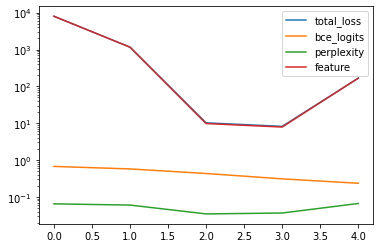

In [8]:
pd.DataFrame(res).T.plot(logy=True)

<AxesSubplot:>

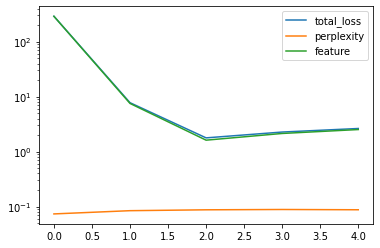

In [12]:
pd.DataFrame(res).T.plot(logy=True)

In [6]:
batch_d = next(iter(dl))

In [7]:
batch_d

{'signal_arr': tensor([[[-6.6461e-01,  5.9815e+00,  1.3425e+01,  ...,  4.6655e+01,
            5.0377e+01,  4.6921e+01],
          [ 7.2442e+01,  8.6798e+01,  8.7595e+01,  ...,  1.1205e+02,
            1.2056e+02,  1.1657e+02],
          [-8.1215e+01, -7.9088e+01, -7.1645e+01,  ..., -4.4263e+01,
           -3.8680e+01, -5.0643e+01],
          ...,
          [-1.3292e-01,  1.7280e+00,  2.7913e+00,  ...,  2.7249e+01,
            2.4325e+01,  1.9539e+01],
          [ 1.3957e+01,  1.8210e+01,  1.5286e+01,  ...,  4.0275e+01,
            3.8414e+01,  3.4427e+01],
          [ 2.5388e+01,  2.7249e+01,  2.7781e+01,  ...,  4.9048e+01,
            4.7985e+01,  4.3997e+01]],
 
         [[-1.1298e+01, -1.8742e+01, -2.0071e+01,  ...,  4.0102e+02,
            4.1192e+02,  4.1086e+02],
          [-1.4581e+02, -2.4843e+02, -2.5587e+02,  ...,  6.9372e+02,
            7.0329e+02,  7.0568e+02],
          [ 3.8241e+02,  4.6084e+02,  4.8131e+02,  ..., -4.6881e+02,
           -5.0390e+02, -5.4697e+02],
     

Core challenge is adapting data loader to their expected? Where does our code start and fairseq end...?

In [8]:
s_d = hvs[4]

X = s_d['signal_arr']
X.shape

torch.Size([108, 256])